<a href="https://colab.research.google.com/github/AmandeepSingh285/Lung-Disease-Detection/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width = "80%">
  <thead>
    <th>Charecteristic</th>
    <th>Value</th>
  </thead>
  <tr>
    <td> Dataset </td>
    <td> Pneumonia </td>
  </tr>
  <tr>
    <td> Architecture </td>
    <td> AlexNet </td>
  </tr>
  <tr>
    <td> Training </td>
    <td> Custom </td>
  </tr>
</table>

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import shutil
import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam

labels = ["NORMAL", "PNEUMONIA"]

%load_ext tensorboard

checkpoint_path = "/content/drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/weights/alexNet.h5"

print("Libraries imported")

Libraries imported


In [ ]:
driveValImages    = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/val')
driveTestImages   = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/test')
driveTrainImages  = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/train')

In [ ]:
train_datagen = ImageDataGenerator(
                   rescale=1/255.0,
                   rotation_range=20, 
                   zoom_range=0.15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   horizontal_flip=True,
                   vertical_flip=False,
                   )

val_datagen = ImageDataGenerator(
    rescale = 1/255.0
)

train_generator = train_datagen.flow_from_directory(
                                   driveTrainImages,
                                   target_size=(224, 224),
                                   color_mode='rgb',
                                   batch_size= 32,
                                   class_mode='binary',
                                   shuffle = True
                                   )
val_generator = val_datagen.flow_from_directory(
                                driveValImages,
                                target_size=(224, 224),
                                batch_size= 32,
                                color_mode='rgb',
                                class_mode='binary',
                                shuffle = True
                                )

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                driveTestImages,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=False,
                                class_mode='binary',
                                color_mode = 'rgb'
                                )

print("DONE")

Found 4232 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
DONE


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate = 1e-4)

model.compile(optimizer=optimizer,loss=['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'], metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
checkpointOne = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.3,
    min_lr = 3e-7
)
checkpoint_saver = ModelCheckpoint('alexNet.h5', save_best_only=True)
checkPointTwo = EarlyStopping(monitor='acc', patience=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%d%m%Y-%H%M")
checkPointThree = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [checkpointOne, checkpoint_saver, checkPointTwo, checkPointThree]

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=callbacks_list) 

Epoch 1/10
133/133 [==============================] - 861s 6s/step - loss: 0.5183 - accuracy: 0.8696 - precision: 0.9160 - recall: 0.9214 - val_loss: 7.9847 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 2/10
133/133 [==============================] - 77s 579ms/step - loss: 0.3345 - accuracy: 0.8967 - precision: 0.9345 - recall: 0.9364 - val_loss: 14.2053 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 3/10
133/133 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.9227 - precision: 0.9507 - recall: 0.9527
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
133/133 [==============================] - 76s 574ms/step - loss: 0.2161 - accuracy: 0.9227 - precision: 0.9507 - recall: 0.9527 - val_loss: 19.2833 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 4/10
133/133 [==============================] - 77s 581ms/step 

In [ ]:
! mv '/content/alexNet.h5' '/content/drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/weights/alexNet.h5'

In [ ]:
model.load_weights(checkpoint_path)
print("model loaded")

model loaded


In [ ]:
metrics = model.evaluate(test_generator, return_dict = True)
for metric in metrics:
  print(f"{metric} : {metrics[metric]}")

20/20 [==============================] - 3s 127ms/step - loss: 0.4046 - accuracy: 0.8766 - precision: 0.8455 - recall: 0.9821
loss : 0.40461623668670654
accuracy : 0.8766025900840759
precision : 0.8454746007919312
recall : 0.9820512533187866


In [ ]:
predictions = model.predict(test_generator)
predictions = np.round(abs(predictions))
classes = test_generator.labels
print(predictions)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

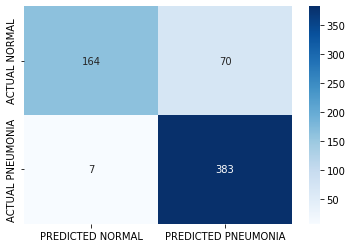

In [ ]:
# creating confusion matrix

xlabels = ["PREDICTED NORMAL", "PREDICTED PNEUMONIA"]
ylabels = ["ACTUAL NORMAL", "ACTUAL PNEUMONIA"]

matrix = confusion_matrix(classes, predictions)
sns.heatmap(matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = xlabels, yticklabels = ylabels)